# Analysis of the Airlines Arrival Delay Causes

## 1)Background of the data


* The dataset is published on the open data souce Kaggle.
* It is collected by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS). They track the on-time performance of domestic flights operated by large air carriers.
* This dataset is only for year 2008.
* Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly air Traval Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website.
* BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made avaiable to the public at the time the Air Travle Consumer Report is released. 
* *The above information is from Kaggle. https://www.kaggle.com/giovamata/airlinedelaycauses*


## 2) Links to the Airlines Arrival Delay Dataset
* Data Introduction: https://www.kaggle.com/giovamata/airlinedelaycauses
* Data Download: https://www.kaggle.com/giovamata/airlinedelaycauses/download

In [1]:
#The direct downloadlink to the Kaggle data set
data_url='https://www.kaggle.com/giovamata/airlinedelaycauses/download'

## 3) Import the eccential modules 

#### Currently, I only need the _pandas_, _numpy_, _matplotlib_ ,and _seaborn_ .
#### The _scikitlearn_ et.al. will be imported later 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

## 4) Import the local dataset
* I've downloaded the dataset in advance to save time;
* The name of the dataset is DelayedFlights.csv

In [13]:
data_airline=pd.read_csv('DelayedFlights.csv')

## 4) Desplay the basic information of the dataset.
* The dataset contains 1936758 rows and 30 columns
* The column names are as listed.
* The meaning of each column can be found on the website http://stat-computing.org/dataexpo/2009/the-data.html
* Here are some need-to-note details of them:
<br>
  DayOfWeek: 1 (Monday) - 7 (Sunday)
<br>
  DepTime:  actual departure time (local, hhmm)
<br>
  CRSDepTime: scheduled departure time (local, hhmm)
<br>
  ArrTime: actual arrival time (local, hhmm)
<br> 
  CRSArrTime: scheduled arrival time (local, hhmm)
<br>  
  ActualElapsedTime: in minutes
<br>  
  CRSElapsedTime: in minutes
<br>  
  AirTime: in minutes
<br>  
  ArrDelay: arrival delay, in minutes
<br>    
  DepDelay: departure delay, in minutes
<br> 
  Distance: in miles
<br> 
  TaxiIn: taxi in time, in minutes
<br> 
  TaxiOut: taxi out time in minutes
<br>
  Cancelled: was the flight cancelled?
<br>
  CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
<br>
  Diverted: 1 = yes, 0 = no
<br>
  CarrierDelay: in minutes
<br>
  WeatherDelay: in minutes
<br>
  NASDelay: in minutes
<br>  
  SecurityDelay: in minutes
<br>
  LateAircraftDelay: in minutes

In [14]:
row_num,col_num=data_airline.shape
print('There are ',row_num,' rows','and ',col_num,'columns.')
list(data_airline.columns)

There are  1936758  rows and  30 columns.


['Unnamed: 0',
 'Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

### 4.1) Examples of the dataset.
* Below are **first five rows** of the data, 

In [15]:
data_airline.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


### 4.2) Data type information for each columns.
* Below are the **information summary** about the data type

In [16]:
data_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
Unnamed: 0           int64
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(11), object(5)
me

### 4.3) Basic statistical summary for each columns.
* The below form is made from the _describe_ method of the dataframe _data_airline_ 
* It tells us that the dataset only contains the flight information of **year 2008**.  

In [18]:
data_airline.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


## 5) Handle the missing observations for each column of the dataset
* First, check the proportion of the missing values for each column. The column names are listed by descending order of the proportion of the missing obeservations.


In [19]:
#Create a dataframe indicating the proportion of missing values for each column
PropOfMissingValue=pd.DataFrame(np.sum(pd.isnull(data_airline))/row_num,columns=['Proportion of missing value'])
# Display the columns according to descending missing value proportion order
PropOfMissingValue.sort_values(by=['Proportion of missing value'],ascending=False)

,Proportion of missing value
LateAircraftDelay,0.355889
SecurityDelay,0.355889
NASDelay,0.355889
WeatherDelay,0.355889
CarrierDelay,0.355889
ActualElapsedTime,0.004330
AirTime,0.004330
ArrDelay,0.004330
ArrTime,0.003671
TaxiIn,0.003671


* The parameters named _LateAircraftDelay_ , _SecurityDelay_, _NASDelay_, _WeatherDelay_, _CarrierDelay_ contains the largest proprotion of missing values. But this is acceptable,because only the flights which were delayed or canceled contains these five parameters.
* Some values in _ArrTime_, _DepTime_, et.al are also missing, but this may be due to the cancellation of the flights. Thus this is also acceptable. 
* But whether the flight was canceled or diverted or not is critical for the analysis, thus the rows whose _Cancelled_ or _Diverted_ contains missing values will be removed.
* The following is to remove the rows containing missing values in specific columns.

In [20]:
InTorlerantColumn=['Cancelled' ,'Diverted']
#Delete rows whose columns in InTorlerantColumn contain missing values
data_airline = data_airline.dropna(axis=0, subset=InTorlerantColumn)

* Next step: Remeasure the dataset size and the proporiton of the missing value to ensure that all the unrequried datasets are successfully removed. 

In [21]:
row_new,col_new= data_airline.shape
print('The row number changes into ',row_new, 'from ',row_num,' after removing nulls')
#Remeasure the proportion of missing values for each column
PropOfMissingValue=pd.DataFrame(np.sum(pd.isnull(data_airline))/row_num,columns=['Proportion of missing value'])
# ReDisplay the columns according to descending missing value proportion order
PropOfMissingValue.sort_values(by=['Proportion of missing value'],ascending=False)

The row number changes into  1936758 from  1936758  after removing nulls


,Proportion of missing value
LateAircraftDelay,0.355889
SecurityDelay,0.355889
NASDelay,0.355889
WeatherDelay,0.355889
CarrierDelay,0.355889
ActualElapsedTime,0.004330
AirTime,0.004330
ArrDelay,0.004330
ArrTime,0.003671
TaxiIn,0.003671


## 6) Goal: Build a model to predict the flight state(On-Time/Delayed/Cancelled)
Try to use a supervised methods to predict whether the flight has a high probability of delayed or cancelled in advance.

## 7) Basic statistics of the flight datasets
### 7.1) Step1: Define the flight state: On-Time/ Delayed/Cancelled

#### 7.1.1) The distribution of the arrival delay
* Here I think for the travellers, the arrival time to the destination is more important than the departure time. Thus the overal flight delay is mainly based on the arrival time.

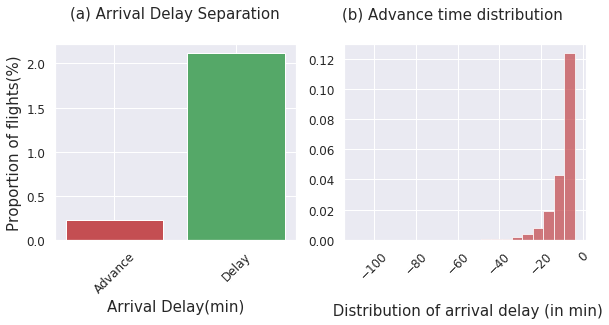

In [179]:
#Load the arrival delay of all the not cancelled flights 
ArrDelay_NotCancelled=data_airline[data_airline.Cancelled==0]['ArrDelay'];
#First measure the proportion of flights iwth arrival delay<0 and the proportion of flights iwth arrival delay>0
NumOfNegativeArrDelay=np.sum(ArrDelay_NotCancelled<0)
NumOfPositiveArrDelay=np.sum(ArrDelay_NotCancelled>0)
PropOfNegativeArrDelay=NumOfNegativeArrDelay/np.sum(ArrDelay_NotCancelled)*100 # %
PropOfPositiveArrDelay=NumOfPositiveArrDelay/np.sum(ArrDelay_NotCancelled)*100 # %

# (a) Make a bar plot of the number of flights arrived in advance   
plt.subplot(1,3,1)
sns.set()
plt.bar([1,2],[PropOfNegativeArrDelay,PropOfPositiveArrDelay],color=['r','g']);
plt.xticks([1,2],['Advance','Delay'],rotation=45,fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel('Arrival Delay(min)',fontsize=15,x=0.5,y=-0.5);
plt.ylabel('Proportion of flights(%)',fontsize=15,x=-10,y=0.5);
plt.subplots_adjust(bottom=0.2) # make room for x-axis labels
plt.title('(a) Arrival Delay Separation',fontsize=15,x=0.5,y=1.1);

# (b) Plot the distribution of those flights arrived in advance
AdvanceTime=ArrDelay_NotCancelled[ArrDelay_NotCancelled<0];
Advance_Min=np.min(AdvanceTime)
Bin_Advance=np.arange(Advance_Min,0,5)
plt.subplot(1,3,2)
sns.set()
plt.hist(AdvanceTime,bins=Bin_Advance,density=True, facecolor='r', alpha=0.75)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\n Distribution of arrival delay (in min)',fontsize=15,x=0.5,y=-0.5)
plt.title('(b) Advance time distribution',fontsize=15,x=0.45,y=1.1)
plt.subplots_adjust(left=-1) # make room for yticks 


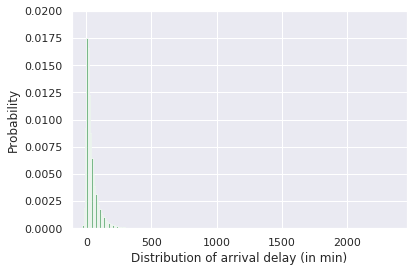

In [69]:
Delay_Min=np.min(ArrDelay_NotCancelled)
Delay_Max=np.max(ArrDelay_NotCancelled)
Bin1=np.arange(Delay_Min,0,10)
Bin2=np.arange(0.1,Delay_Max,10)
Bin=np.concatenate((Bin1,Bin2))
sns.set()
plt.hist(ArrDelay_NotCancelled,bins=Bin,density=True, facecolor='g', alpha=0.75)
plt.xlabel('Distribution of arrival delay (in min)')
plt.ylabel('Probability')
plt.xlim(Delay_Min, Delay_Max)
plt.ylim(0, 0.02)
#plt.grid(True)
plt.show()

In [23]:
#Define a new column named flight status to define the flight status (One-Time/Delayed/Cancelled)
FlightStatus=data_airline.Cancelled*2
print(FlightStatus)
print(np.sum(data_airline.Cancelled==1))
#Find about the flights that were not cancelled
ArrDelay=data_airline[FlightStatus==0]['ArrDelay'];
FlightStatus[FlightStatus==0]=ArrDelay>15
print(FlightStatus)

0          0
1          0
2          0
3          0
4          0
          ..
1936753    0
1936754    0
1936755    0
1936756    0
1936757    0
Name: Cancelled, Length: 1936758, dtype: int64
633
0          False
1          False
2          False
3           True
4          False
           ...  
1936753     True
1936754     True
1936755     True
1936756    False
1936757    False
Name: Cancelled, Length: 1936758, dtype: object


## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?